In [1]:
!pip install -q keras-ocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 65.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 8.1 MB/s eta 0:00:00


In [2]:
import keras_ocr
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5


Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.


Looking for /root/.keras-ocr/crnn_kurapan.h5


In [35]:
img1 = tf.keras.utils.get_file(
'img1.jpg',
'https://prod.cdn-medias.jeuneafrique.com/cdn-cgi/image/q=auto,f=auto,metadata=none,width=1215,fit=cover/https://prod.cdn-medias.jeuneafrique.com/medias/2021/01/12/jad20210112-ass-cameroun-carte-identite.jpg')


img3 = tf.keras.utils.get_file(
'img3.jpg',
'https://afrique.le360.ma/resizer/5du_UOXYLIzcThvEO05GM8G6Ems=/1216x684/filters:format(jpg):quality(70)/cloudfront-eu-central-1.images.arcpublishing.com/le360/7KKKATQLJBBKPKG67BNMIJGMFU.jpg')


In [37]:
# Read images from folder path to image object
images = [
    keras_ocr.tools.read(img1)
]

In [7]:
# generate text predictions from the images
prediction_groups = pipeline.recognize(images)

5/5 [==============================] - 39s 7s/step


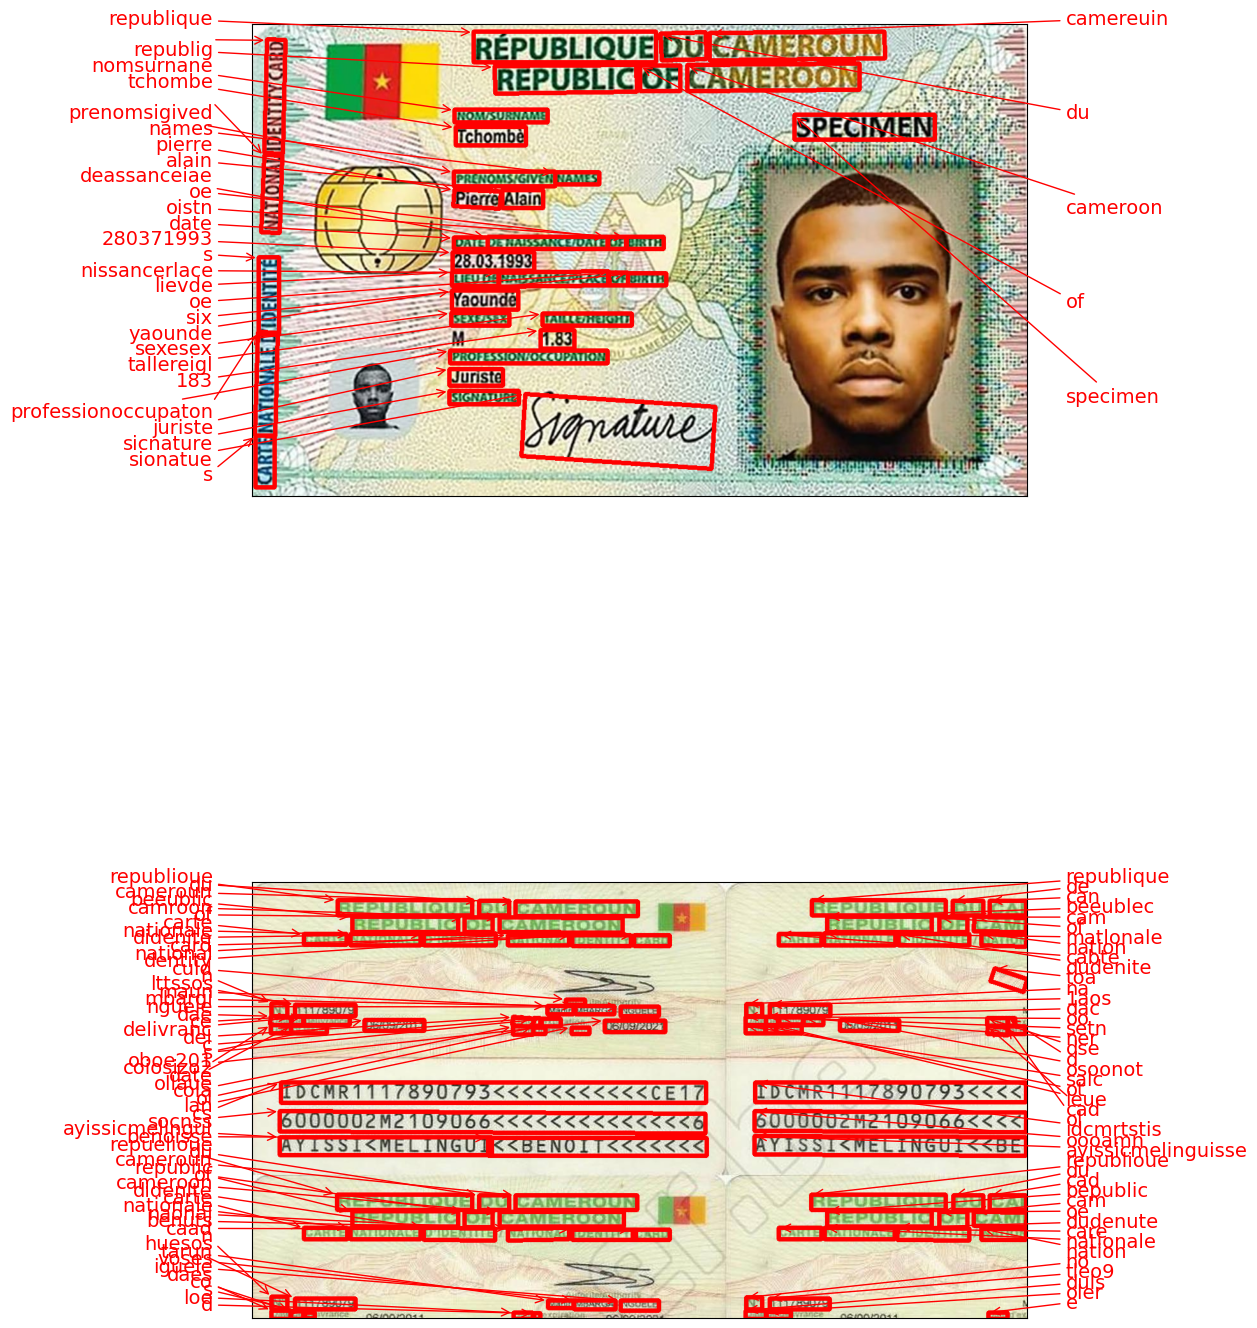

In [8]:
# plot the text predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(10, 20))
for ax, image, predictions in zip(axs, images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image,
                                    predictions=predictions,
                                    ax=ax)

In [29]:
texts = []

predicted_image = prediction_groups[1]
for text, box in predicted_image:
    texts.append(text)
    print(text)

republioue
republique
du
de
can
cameroun
beeublic
beeublec
of
camroon
of
cam
matlonale
carte
nationale
didenite
cabte
dudenite
nation
national
dentity
card
toa
culd
n
na
lttssos
1aos
maun
mbargi
nguele
dae
ce
delivranc
dac
oo
del
setn
c
ner
dse
d
s
oboe201
osoonot
coiosizo2
date
ollaue
salc
ot
leue
cola
cad
ol
ol
lan
cs
idcmrtstis
socnss
oooamn
ayissicmelingul
ayissicmelinguisse
benoisse
repuelioue
republioue
du
cameroun
du
cad
republic
bepublic
of
cameroon
oe
cam
carte
nationale
didenlte
care
nationale
dudenute
naonal
nation
benuts
caad
n
no
huesos
tleo9
tarun
voses
iguele
daes
duls
co
oler
s
loe
e
d


In [30]:
!pip install pyspellchecker
from spellchecker import SpellChecker

!pip install fuzzywuzzy
from fuzzywuzzy import fuzz


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 34.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [31]:
def similarity_word(word, corrected_word):
    return fuzz.ratio(word, corrected_word) / 100.0

def correct_spelling(text, language):
    spell = SpellChecker(language=language)
    words = text.split()
    corrected_words = []
    similarity_words = []

    for word in words:
        corrected_word = spell.correction(word)
        similarity = similarity_word(word, corrected_word)

        # Vérifie si le mot corrigé n'est pas None et est de type str
        if corrected_word is not None and isinstance(corrected_word, str):
          corrected_words.append(corrected_word)
          similarity_words.append(similarity)


    corrected_text = " ".join(corrected_words)
    if corrected_text == '' :
      similarity = 0
    else :
      similarity = max(similarity_words)
    return corrected_text, similarity

In [33]:
language = 'fr'

for i in range(len(texts)) :
  corrected_text, similarity_score = correct_spelling(texts[i], language)  # Appel de la fonction pour corriger le texte
  print(f"Prédiction du modèle : {texts[i]},\t Correction ortho. : {corrected_text},\t  Validité de la prédiction : {similarity_score}\n")  # Affiche le texte corrigé

Prédiction du modèle : republioue,	 Correction ortho. : république,	  Validité de la prédiction : 0.8

Prédiction du modèle : republique,	 Correction ortho. : république,	  Validité de la prédiction : 0.9

Prédiction du modèle : du,	 Correction ortho. : du,	  Validité de la prédiction : 1.0

Prédiction du modèle : de,	 Correction ortho. : de,	  Validité de la prédiction : 1.0

Prédiction du modèle : can,	 Correction ortho. : car,	  Validité de la prédiction : 0.67

Prédiction du modèle : cameroun,	 Correction ortho. : cameroun,	  Validité de la prédiction : 1.0

Prédiction du modèle : beeublic,	 Correction ortho. : ,	  Validité de la prédiction : 0

Prédiction du modèle : beeublec,	 Correction ortho. : ,	  Validité de la prédiction : 0

Prédiction du modèle : of,	 Correction ortho. : on,	  Validité de la prédiction : 0.5

Prédiction du modèle : camroon,	 Correction ortho. : camion,	  Validité de la prédiction : 0.77

Prédiction du modèle : of,	 Correction ortho. : on,	  Validité de la 

In [32]:
language = 'fr'

for i in range(len(predicted_image)) :
  corrected_text, similarity_score = correct_spelling(predicted_image[i][0], language)  # Appel de la fonction pour corriger le texte
  print(f"Prédiction du modèle : {predicted_image[i][0]},\t Correction ortho. : {corrected_text},\t  Validité de la prédiction : {similarity_score}\n")  # Affiche le texte corrigé

Prédiction du modèle : republioue,	 Correction ortho. : république,	  Validité de la prédiction : 0.8

Prédiction du modèle : republique,	 Correction ortho. : république,	  Validité de la prédiction : 0.9

Prédiction du modèle : du,	 Correction ortho. : du,	  Validité de la prédiction : 1.0

Prédiction du modèle : de,	 Correction ortho. : de,	  Validité de la prédiction : 1.0

Prédiction du modèle : can,	 Correction ortho. : car,	  Validité de la prédiction : 0.67

Prédiction du modèle : cameroun,	 Correction ortho. : cameroun,	  Validité de la prédiction : 1.0

Prédiction du modèle : beeublic,	 Correction ortho. : ,	  Validité de la prédiction : 0

Prédiction du modèle : beeublec,	 Correction ortho. : ,	  Validité de la prédiction : 0

Prédiction du modèle : of,	 Correction ortho. : on,	  Validité de la prédiction : 0.5

Prédiction du modèle : camroon,	 Correction ortho. : camion,	  Validité de la prédiction : 0.77

Prédiction du modèle : of,	 Correction ortho. : on,	  Validité de la 

In [38]:
language = 'en'

for i in range(len(predicted_image)) :
  corrected_text, similarity_score = correct_spelling(predicted_image[i][0], language)  # Appel de la fonction pour corriger le texte
  print(f"Prédiction du modèle : {predicted_image[i][0]},\t Correction ortho. : {corrected_text},\t  Validité de la prédiction : {similarity_score}\n")  # Affiche le texte corrigé

Prédiction du modèle : republioue,	 Correction ortho. : ,	  Validité de la prédiction : 0

Prédiction du modèle : republique,	 Correction ortho. : ,	  Validité de la prédiction : 0

Prédiction du modèle : du,	 Correction ortho. : do,	  Validité de la prédiction : 0.5

Prédiction du modèle : de,	 Correction ortho. : de,	  Validité de la prédiction : 1.0

Prédiction du modèle : can,	 Correction ortho. : can,	  Validité de la prédiction : 1.0

Prédiction du modèle : cameroun,	 Correction ortho. : cameroon,	  Validité de la prédiction : 0.88

Prédiction du modèle : beeublic,	 Correction ortho. : republic,	  Validité de la prédiction : 0.75

Prédiction du modèle : beeublec,	 Correction ortho. : ,	  Validité de la prédiction : 0

Prédiction du modèle : of,	 Correction ortho. : of,	  Validité de la prédiction : 1.0

Prédiction du modèle : camroon,	 Correction ortho. : cameroon,	  Validité de la prédiction : 0.93

Prédiction du modèle : of,	 Correction ortho. : of,	  Validité de la prédiction 

In [39]:
Mots = []

for i in range(len(predicted_image)) :
  corrected_text_1, similarity_score_1 = correct_spelling(predicted_image[i][0], 'en')  # Appel de la fonction pour corriger le texte
  corrected_text_2, similarity_score_2 = correct_spelling(predicted_image[i][0], 'fr')

  if similarity_score_1 > similarity_score_2 :
    corrected_text = corrected_text_1
    similarity_score = similarity_score_1
  else :
    corrected_text = corrected_text_2
    similarity_score = similarity_score_2

  Mots.append(corrected_text)

  print(f"Prédiction du modèle : {predicted_image[i][0]},\t Correction ortho. : {corrected_text},\t  Validité de la prédiction : {similarity_score}\n")  # Affiche le texte corrigé

Prédiction du modèle : republioue,	 Correction ortho. : république,	  Validité de la prédiction : 0.8

Prédiction du modèle : republique,	 Correction ortho. : république,	  Validité de la prédiction : 0.9

Prédiction du modèle : du,	 Correction ortho. : du,	  Validité de la prédiction : 1.0

Prédiction du modèle : de,	 Correction ortho. : de,	  Validité de la prédiction : 1.0

Prédiction du modèle : can,	 Correction ortho. : can,	  Validité de la prédiction : 1.0

Prédiction du modèle : cameroun,	 Correction ortho. : cameroun,	  Validité de la prédiction : 1.0

Prédiction du modèle : beeublic,	 Correction ortho. : republic,	  Validité de la prédiction : 0.75

Prédiction du modèle : beeublec,	 Correction ortho. : ,	  Validité de la prédiction : 0

Prédiction du modèle : of,	 Correction ortho. : of,	  Validité de la prédiction : 1.0

Prédiction du modèle : camroon,	 Correction ortho. : cameroon,	  Validité de la prédiction : 0.93

Prédiction du modèle : of,	 Correction ortho. : of,	  Val

In [ ]:
!pip install -q keras-ocr
!pip install pyspellchecker
!pip install fuzzywuzzy
import keras_ocr
import matplotlib.pyplot as plt
import tensorflow as tf
from spellchecker import SpellChecker
from fuzzywuzzy import fuzz


In [32]:


class OCR() :
  def __init__(self, language='fr'):
    self.pipeline = keras_ocr.pipeline.Pipeline()
    self.spell = SpellChecker(language=language)
    self.fuzzy = fuzz


  def read_images(self, image_path):
    images = [keras_ocr.tools.read(image_path)]
    return images

  def recognize_text(self, images):
    prediction_groups = self.pipeline.recognize(images)
    return prediction_groups

  def plot_predictions(self, images, prediction_groups):
      fig, axs = plt.subplots(nrows=len(images), figsize=(10, 20))
      if len(images) == 1:
          axs = [axs]
      for ax, image, predictions in zip(axs, images, prediction_groups):
          keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)

  def get_text(self, prediction_groups_part):
    texts = []
    info_image = prediction_groups_part
    for text, box in info_image :
      texts.append(text)
    return texts


  def similarity_word(self, word, corrected_word):
    return self.fuzzy.ratio(word, corrected_word) / 100.0

  def correct_spelling(self, text, language):
      words = text.split()
      corrected_words = []
      similarity_words = []

      for word in words:
          corrected_word = self.spell.correction(word)
          similarity = self.similarity_word(word, corrected_word)

          # Vérifie si le mot corrigé n'est pas None et est de type str
          if corrected_word is not None and isinstance(corrected_word, str):
            corrected_words.append(corrected_word)
            similarity_words.append(similarity)


      corrected_text = " ".join(corrected_words)
      if corrected_text == '' :
        similarity = 0
      else :
        similarity = max(similarity_words)
      return corrected_text, similarity

  def get_all(self, texts):
    Mots = []
    score = []
    donnees = []

    for i in range(len(texts)) :
      corrected_text_1, similarity_score_1 = self.correct_spelling(texts[i], 'en')  # Appel de la fonction pour corriger le texte
      corrected_text_2, similarity_score_2 = self.correct_spelling(texts[i], 'fr')

      if similarity_score_1 > similarity_score_2 :
        corrected_text = corrected_text_1
        similarity_score = similarity_score_1
      else :
        corrected_text = corrected_text_2
        similarity_score = similarity_score_2

      Mots.append(corrected_text)
      score.append(similarity_score)

    for i,j,k in zip(texts, Mots, score) :
      lien = (i, j, k)
      donnees.append(lien)

    return donnees

  def all_in_one_OCR(self, image_path, show):
    all_infos = {}
    images = self.read_images(image_path)
    prediction_groups = self.recognize_text(images)
    if show == True :
      self.plot_predictions(images, prediction_groups)
    n = len(prediction_groups)
    for i in range(n) :
      texts = self.get_text(prediction_groups[i])
      donnees = self.get_all(texts)
      all_infos[f"Image {i}"] = donnees
    return all_infos



In [2]:
img1 = tf.keras.utils.get_file(
'img1.jpg',
'https://prod.cdn-medias.jeuneafrique.com/cdn-cgi/image/q=auto,f=auto,metadata=none,width=1215,fit=cover/https://prod.cdn-medias.jeuneafrique.com/medias/2021/01/12/jad20210112-ass-cameroun-carte-identite.jpg')


190277/190277 [==============================] - 0s 0us/step


Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
2/2 [==============================] - 11s 964ms/step
{'Image 0': [('republique', 'république', 0.9), ('camereuin', 'cameroun', 0.82), ('du', 'du', 1.0), ('', '', 0), ('cameroon', 'cameroun', 0.88), ('republig', '', 0), ('of', 'on', 0.5), ('nomsurnane', '', 0), ('specimen', 'spécimen', 0.88), ('tchombe', 'tombe', 0.83), ('', '', 0), ('prenomsigived', '', 0), ('names', 'dames', 0.8), ('pierre', 'pierre', 1.0), ('alain', 'alpin', 0.8), ('deassanceiae', '', 0), ('oe', 'de', 0.5), ('oistn', 'oison', 0.8), ('date', 'date', 1.0), ('280371993', '280371993', 1.0), ('s', 'a', 0.0), ('lievde', 'livre', 0.55), ('nissancerlace', '', 0), ('oe', 'de', 0.5), ('six', 'six', 1.0), ('yaounde', '', 0), ('sexesex', 'sexes', 0.83), ('tallereigl', '', 0), ('183', '183', 1.0), ('', '', 0), ('professionoccupaton', '', 0), ('juriste', 'juriste', 1.0), ('sicnature', 'signature', 0.89), ('sionatue', 'signature', 0.82), ('s

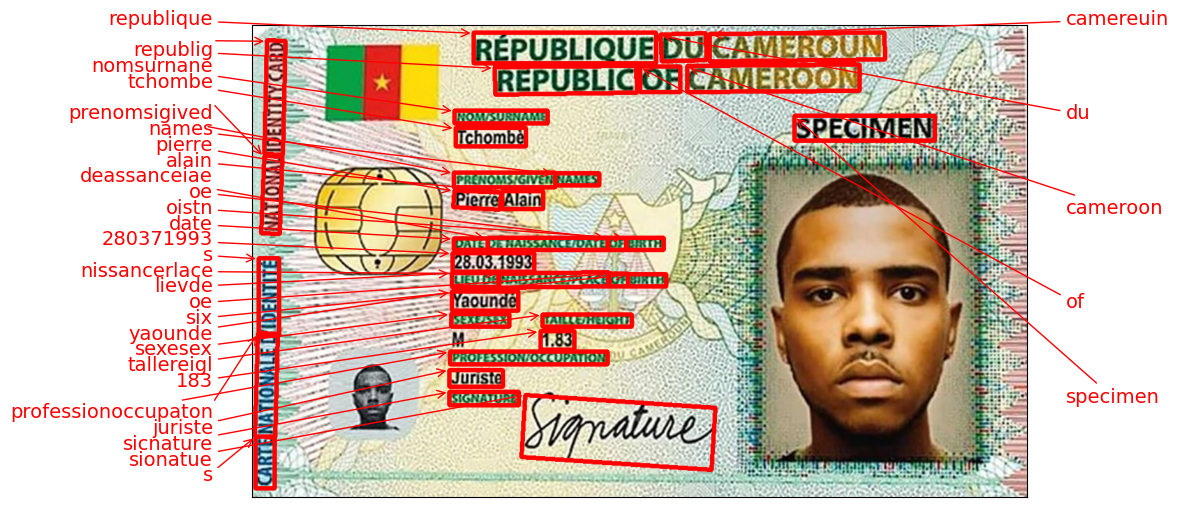

In [33]:
# Création d'une instance de la classe OCR
ocr_instance = OCR('fr')

# Appel de la méthode all_in_one_OCR avec l'image img1
resultat = ocr_instance.all_in_one_OCR(img1, True)

# Affichage du résultat
print(resultat)